<a href="https://colab.research.google.com/github/wayne-chi/Election_ETL_Pipeline_1/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report

Task

> Allegations of vote manipulation and irregularities have been widespread, prompting a thorough investigation into the matter.Your mission, should you choose to accept it, is to help us uncover potential voting irregularities and ensure the transparency of the election results. You will achieve this by identifying outlier polling units where the voting results deviate significantly from neighbouring units, indicating potential influences or rigging.

\

## Methodology
---
### **Step 1**
First the data is loaded into mongodb for efficient storage and to use its
optimal geoindexing.\
To achieve this, the data is pulled and transformed to be suitable for MongoDB.  MOngoDB stores location data in this object format {type: "type e.g Points", coordinates:[long, lat]}  \

Then Created index on the locaion field

---
### **Step 2**
The data is transformed and key metrics calculated. Mongodb aggregate pipeline is used
- Select the data for the state
- Do a self join, the criteria for this join is those within 3Kmm and not equal to the same pooling unit.
- For each of hte data, calculate summary statistics (mean, std and count) of those within its neighborhood, for each party column
- return the needed data

---
### **Step 3**
Calculate the Z score which tells you how dispersed a point is from the rest points. \
Z values are typically within 3 std values. values above this can be considered outlliers.

A Z score of 4 is achieved by 0.003% of points (i.e 3 in 100k points)
There are over 100k pooling unit centers in the whole country, this implies that we have to push the z score boundary. \

 I have chosn a threshold of 5. ( well 3 is still fine)

 ---

### **Step 4**
Find the outliers for each party vote counts by subsetting /filtering out the Z score below the threshold, also thos with little numbers of sorrouding neighbours as the count would also influence the result.  I have set a count threshold of 3 values minimum. \
Those centres with only 1 or 2 neighbours may not be considered outliers ( as what is observed in riverrine areas and islands)

---

### **Step 5**
Plot and observe each party and see locations and influence of their outliers

---

### **Step 6**
Compare results across the parties

---



## **Result**

### **Top 5 Outliers in Each Party**
*The color sclae shows the values of the Z-score, red meaning higher z scores, the size of the bubble indicate the size of the  chart as indicated by the values compared to those around*

---
####  **Top 5 Outliers in APC**




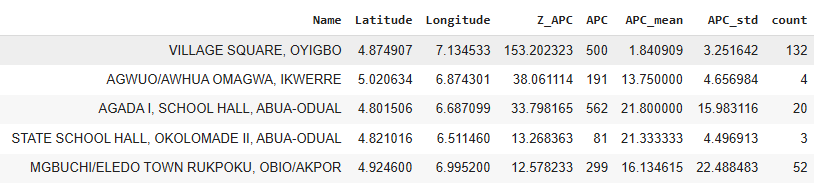


#### **Geographical Distribution of Outliers IN APC**

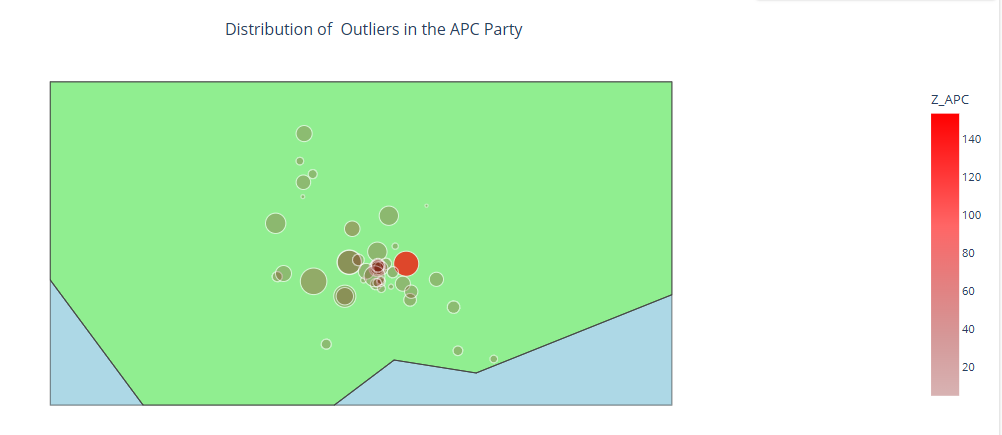

---

#### **Top 5 Outlier In PDP**

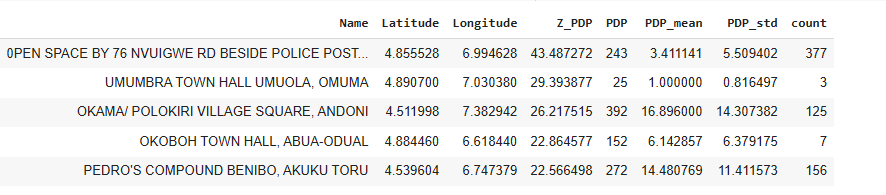

#### **Geographical Distribution of Outliers in PDP**
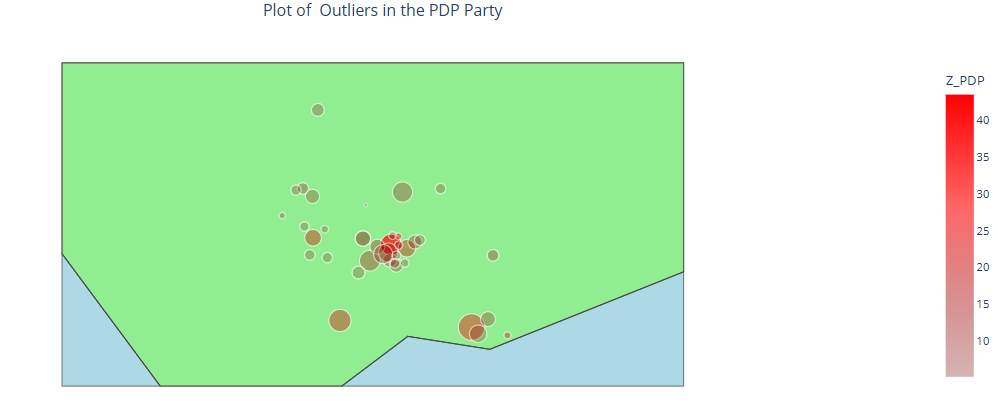

---

#### **Top 5 Outliers in NNPP**

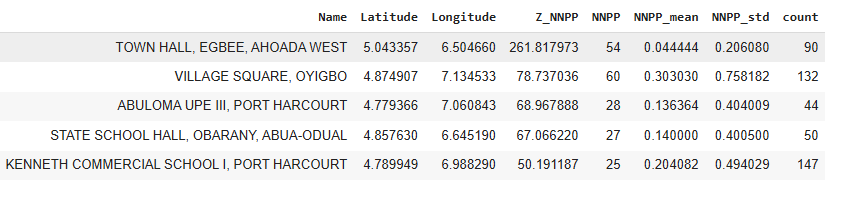

#### **Geographical Distribution of Outliers in NNPP**

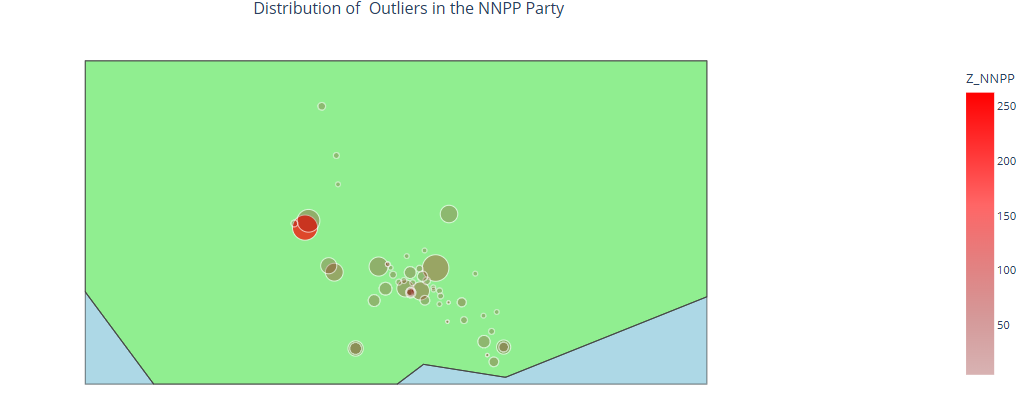


---

#### **Top 5 Outliers in LP**


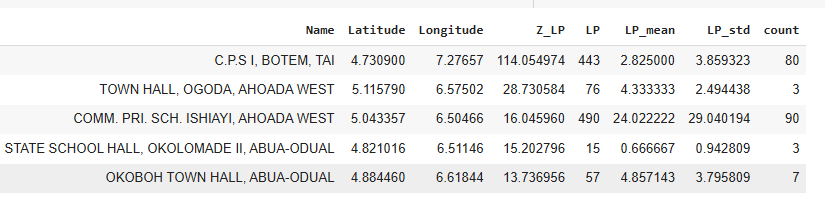

#### **Geographical Distribution oF LP**

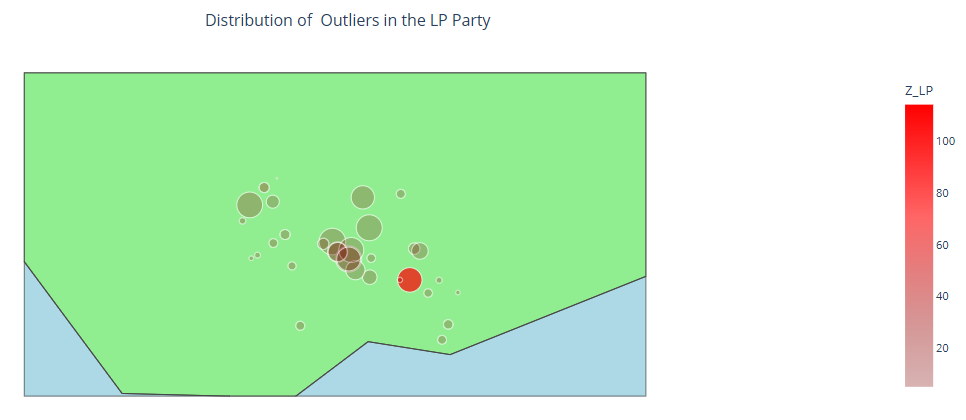


### **Number OF Pooling Unit Outliers for each Party**

---
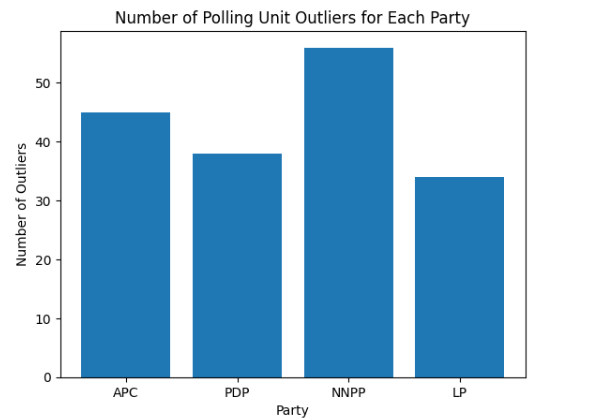


### **Average Outlier Score**

---
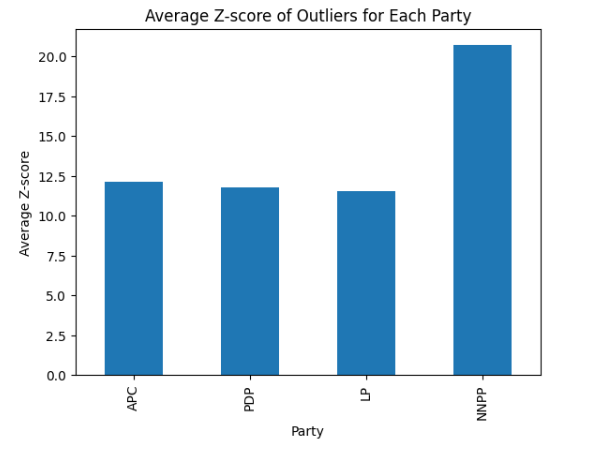




### **Geographical Plot Of All Parties**

---
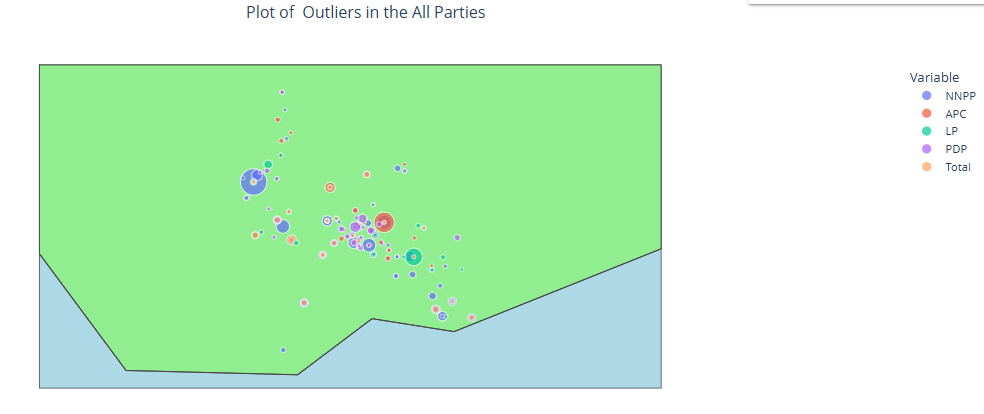


*The color represent different Parties the bubble sizes represent the Outlier Score*




## Summary
-  Of 4769 polling unit stations, outlier value where detected in 156 different units
- The parties had
   - APC : 45
   - PDP : 38
   - NNPP : 56
   - LP: 34

- NNPP had both highes number in outliers in unit and average


